# Best Products Predictive Model

In [1]:
import numpy as np
import pandas as pd

In [2]:
amazon = pd.read_csv("amazon.csv") 


In [3]:
amazon.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN


#### Cleaning the data

In [4]:
# focusing on customer engagement 

df = amazon.drop(columns=['number_available_in_stock', 'uniq_id', 'number_of_answered_questions', 
                          'customers_who_bought_this_item_also_bought', 'description', 'product_information', 
                         'product_description', 'items_customers_buy_after_viewing_this_item', 
                          'customer_questions_and_answers', 'sellers', 'customer_reviews'], axis=1)

df.head()

,product_name,manufacturer,price,number_of_reviews,average_review_rating,amazon_category_and_sub_category
0,Hornby 2014 Catalogue,Hornby,£3.42,15,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
1,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,2,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,17,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,1,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,3,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...


In [5]:

newlist = []
list = df["price"]

for i in list:
    item = str(i).replace("£","")
    newlist.append(item)
    
    
df["price_euros"] = newlist

In [6]:
nl = []
least = df["average_review_rating"]

for i in least:
    item = str(i).replace(" out of 5 stars","")
    nl.append(item)
    
    
df["average_review_rating"] = nl

In [7]:
Mdf = df.drop(columns=['manufacturer', 'amazon_category_and_sub_category', 'product_name', 'price'], axis=1)

Mdf.head()

,number_of_reviews,average_review_rating,price_euros
0,15,4.9,3.42
1,2,4.5,16.99
2,17,3.9,9.99
3,1,5.0,39.99
4,3,4.7,32.19


In [8]:
# Convert categorical data to numerical data using cat.codes
df['manufacturer'] = df['manufacturer'].astype('category')
Mdf['Manufacturer_codes'] = df['manufacturer'].cat.codes

df['amazon_category_and_sub_category'] = df['amazon_category_and_sub_category'].astype('category')
Mdf['category_codes'] = df['amazon_category_and_sub_category'].cat.codes

df['product_name'] = df['product_name'].astype('category')
Mdf['product_codes'] = df['product_name'].cat.codes


# View the converted DataFrame
Mdf.head()


,number_of_reviews,average_review_rating,price_euros,Manufacturer_codes,category_codes,product_codes
0,15,4.9,3.42,1029,164,3986
1,2,4.5,16.99,801,164,3316
2,17,3.9,9.99,2555,164,1779
3,1,5.0,39.99,1029,164,3655
4,3,4.7,32.19,1029,164,3965


In [9]:
# Convert the 'number_of_review' column to numeric type; set non-numeric values to NaN
Mdf["number_of_reviews"] = pd.to_numeric(Mdf["number_of_reviews"], errors="coerce")
Mdf["price_euros"] = pd.to_numeric(Mdf["price_euros"], errors="coerce")

In [10]:
# drop rows that contain NaN values
Mdf = Mdf.dropna()
Mdf.head()

,number_of_reviews,average_review_rating,price_euros,Manufacturer_codes,category_codes,product_codes
0,15.0,4.9,3.42,1029,164,3986
1,2.0,4.5,16.99,801,164,3316
2,17.0,3.9,9.99,2555,164,1779
3,1.0,5.0,39.99,1029,164,3655
4,3.0,4.7,32.19,1029,164,3965


In [11]:
# Putting feature variables to X
X = Mdf.drop('average_review_rating',axis=1)
# Putting target variable to y
y = Mdf['average_review_rating']

In [12]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)
X_train.shape, X_test.shape

((6396, 5), (2133, 5))

In [13]:
# apply random forest algorithm to dataset 

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [14]:
# checking the oob score

#Score of the training dataset obtained using an out-of-bag estimate. This attribute exists only when oob_score is True.

classifier_rf.oob_score_

0.5383051907442151

In [15]:
y_pred = classifier_rf.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5297702766057196


In [19]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

/Users/jocelyndisla/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x174a9d310>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1753ca610>})

In [20]:


# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 10, 'n_estimators': 349}


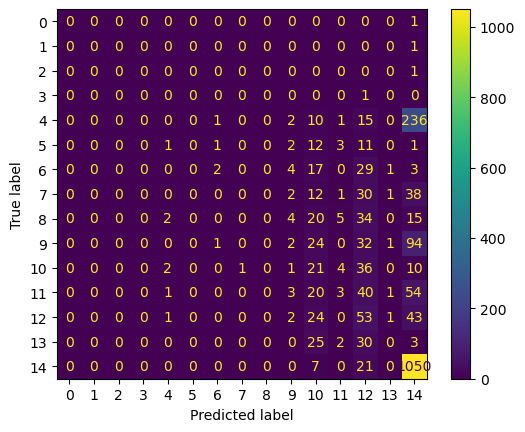

In [18]:

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [21]:
# visualize feature importance
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))

sel.fit(X_train, y_train)

sel.get_support()

array([ True,  True, False, False,  True])

In [22]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

3

In [23]:
X.head()

,number_of_reviews,price_euros,Manufacturer_codes,category_codes,product_codes
0,15.0,3.42,1029,164,3986
1,2.0,16.99,801,164,3316
2,17.0,9.99,2555,164,1779
3,1.0,39.99,1029,164,3655
4,3.0,32.19,1029,164,3965


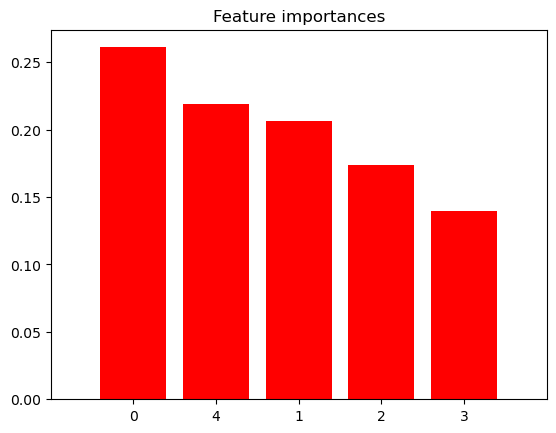

In [24]:
#plotting feature importance
import matplotlib.pyplot as plt
importances = sel.estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
# X is the train data used to fit the model 
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

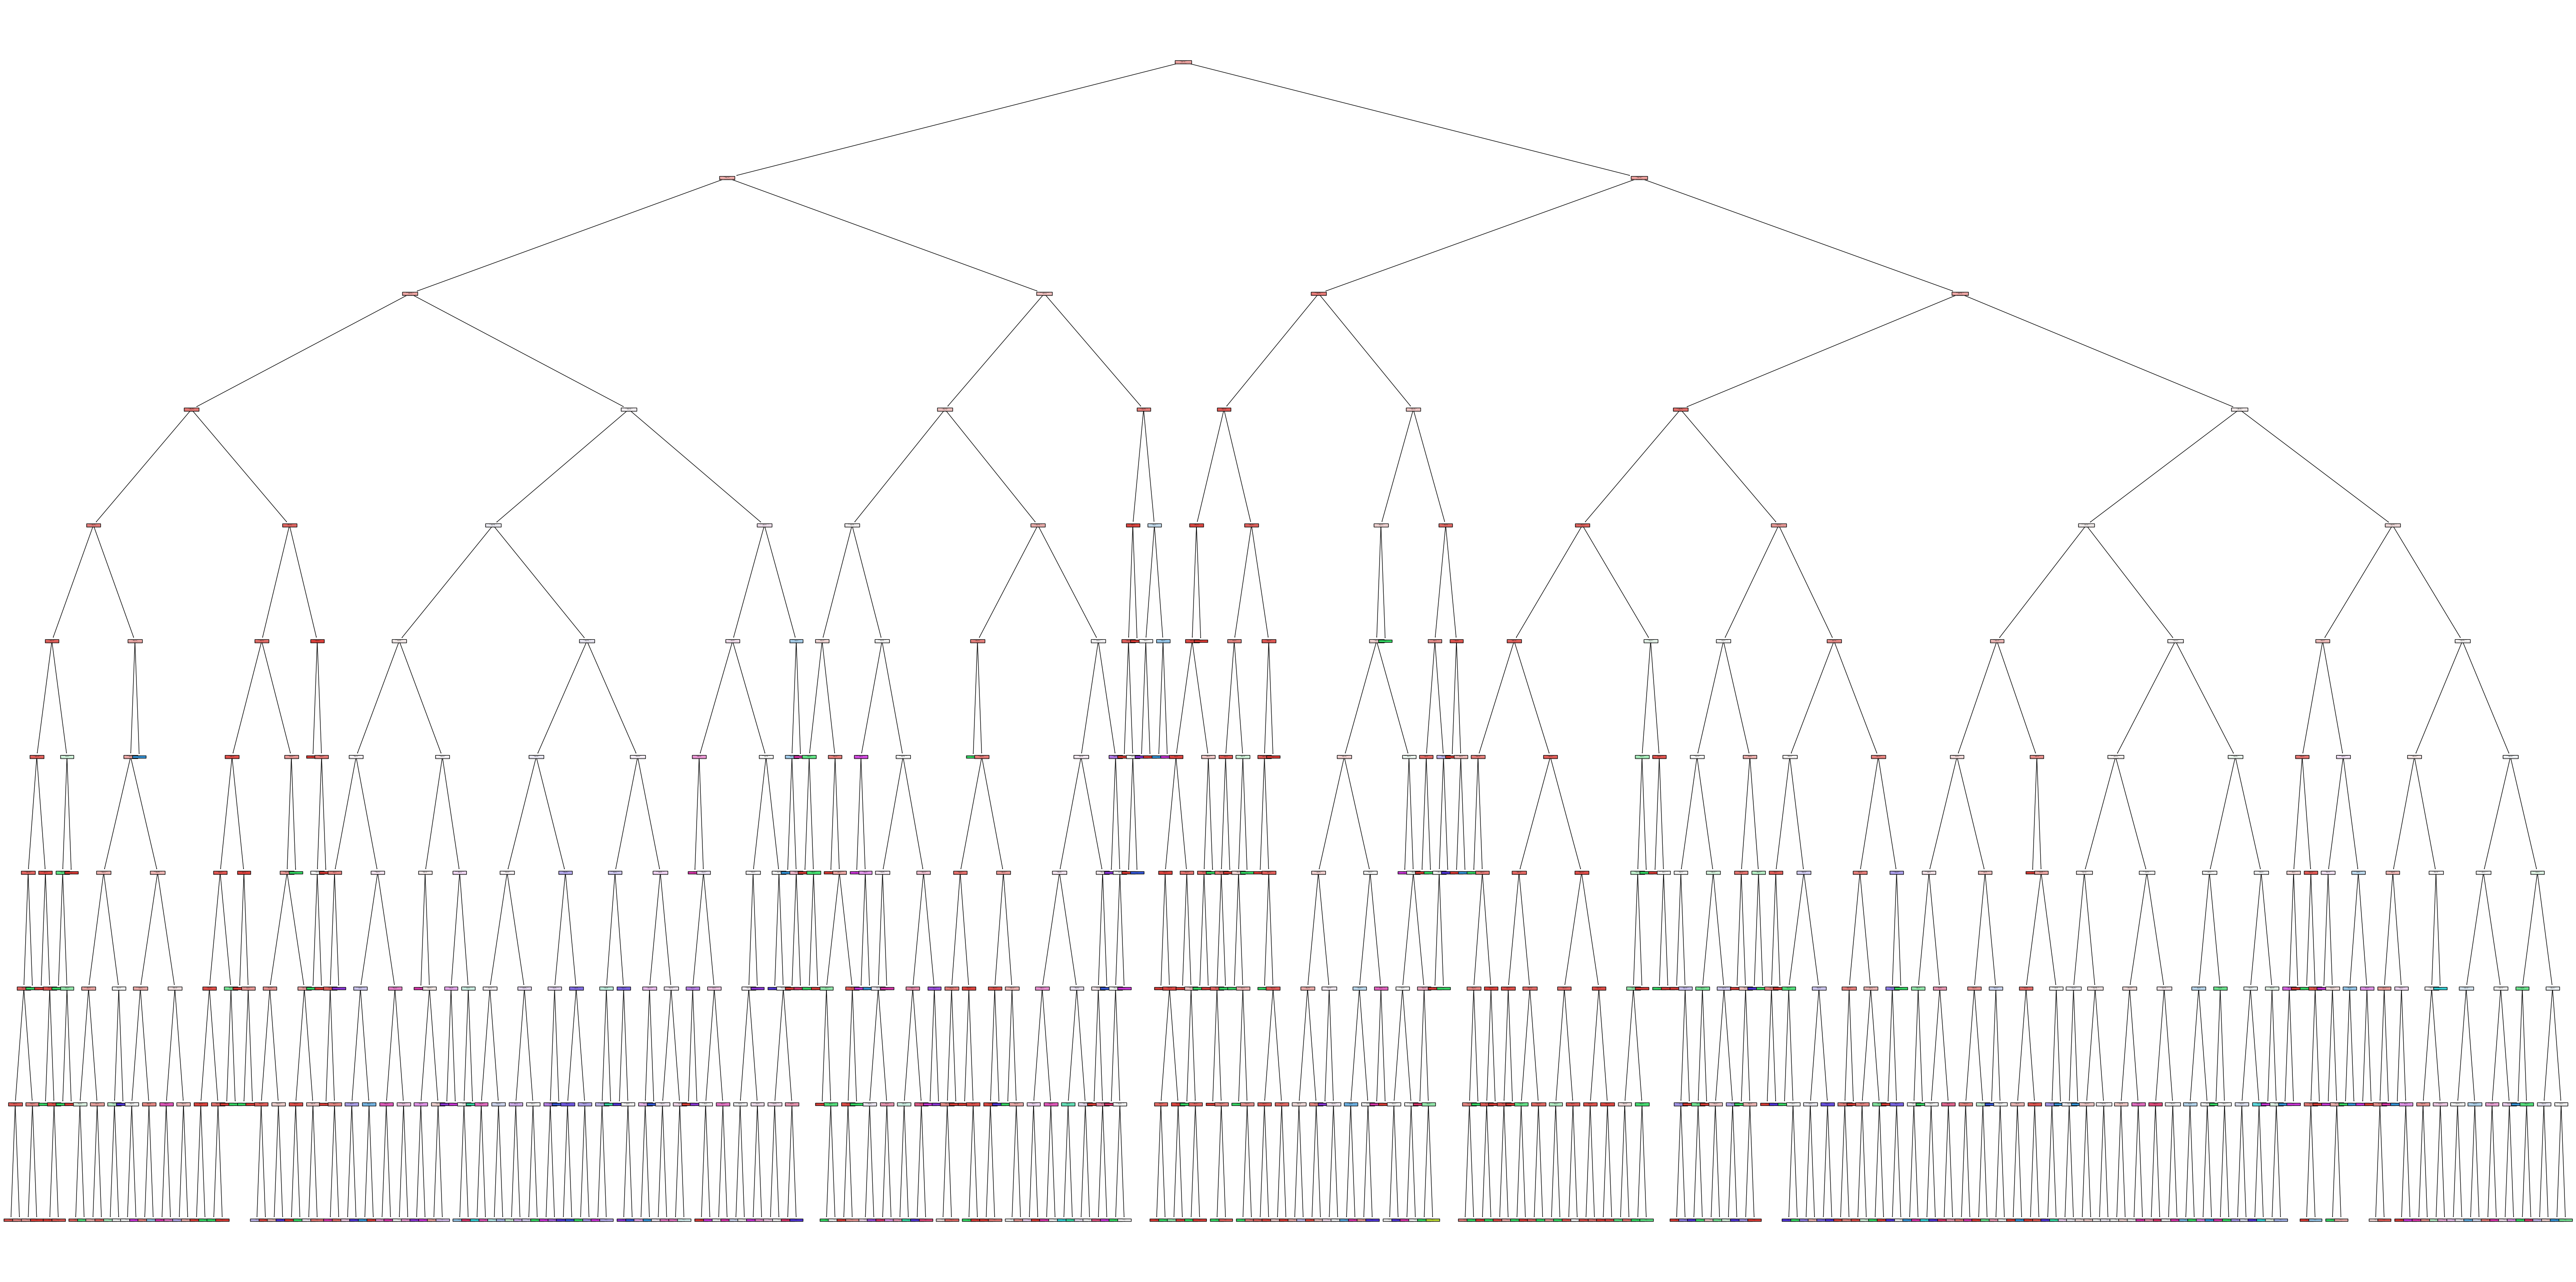

In [35]:
# visualize model

from sklearn.tree import plot_tree

feature_list = X.columns.tolist()

plt.figure(figsize=(80,40))
plot_tree(best_rf.estimators_[5], feature_names = feature_list,filled=True);